# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** Ruhan Masykuri
- **Email:** ruhanmasykuri@gmail.com
- **ID Dicoding:** [Input Username]

## Menentukan Pertanyaan Bisnis

- Pada hari apa layanan bike sharing paling banyak dan paling sedikit digunakan?
- Kapan waktu paling banyak dan paling sedikit penggunaan layanan bike sharing?
- Apakah cuaca berpengaruh terhadap permintaan layanan sharing bike?
- Bagaimana peingkatan permintaan layanan sharing bike dari tahun sebelumnya?

## Import Semua Packages/Library yang Digunakan

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [8]:
day_df = pd.read_csv("bike_sharing_dataset/day.csv")

In [9]:
hour_df = pd.read_csv("bike_sharing_dataset/hour.csv")

### Assessing Data

#### day_df

In [12]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [13]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [14]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [15]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


**Insight:**
- Column dteday masih bertipe object (ubah jadi dtime[to_datetime])
- Tidak terdapat missing value pada day_df
- Tidak terdapat duplikasi datapada day_df

#### hour_df

In [18]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [19]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [20]:
print("Jumlah duplikasi :", hour_df.duplicated().sum())

Jumlah duplikasi : 0


In [21]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


**Insight:**
- Column dteday pada hour_df masih bertipe object
- Tidak ada missing value pada hour_df
- Tidak ada data duplikasi pada hour_df

### Cleaning Data

In [24]:
day_df["dteday"] = pd.to_datetime(day_df["dteday"])

In [25]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [26]:
hour_df["dteday"] = pd.to_datetime(hour_df["dteday"])
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [27]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [28]:
day_df.to_csv("day1_df.csv", index=False)
hour_df.to_csv("hour1_df.csv", index=False)

**Insight:**
- dilakukan perubahan tipe data menjadi datetime pada colom dteday
- Dibuat file day1_df.csv dan hour1_df.csv untuk digunakan pada visualisasi menggunakan streamlit

## Exploratory Data Analysis (EDA)

### Explore ...

#### day

In [33]:
day_df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [34]:
day_df.groupby(by="weekday").cnt.sum().sort_values(ascending=False)

weekday
5    487790
4    485395
6    477807
3    473048
2    469109
1    455503
0    444027
Name: cnt, dtype: int64

**Pada hari apa layanan bike sharing paling banyak dan paling sedikit digunakan?**
- Pada hari ke-5 terbanyk dengan 487790 permintaan dan paling sedikit pada hari ke-0 dengan 444027 permintaan

In [36]:
day_df.groupby(by="weathersit").agg({
    "cnt": ["max", "min", "sum"]
})

cnt              
             max  min      sum
weathersit                    
1           8714  431  2257952
2           8362  605   996858
3           4639   22    37869

**Apakah cuaca berpengaruh terhadap permintaan layanan sharing bike?**
- Terdapat perbedaan permintaan yang sangat signifikan antara kategori cuaca satu, dua, dan tiga. Paling banyak hari dengan kategori cuaca 'satu' memiliki 2257952 permintaan, kategori 'dua' memiliki 996858 permintaan, dan paling sedikit pada kategori 'tiga' dengan 37869 permintaan. Sehingga disimpulkan cuaca sangat berpengaruh terhadap permintaan layanan sharing bike.

In [38]:
day_df.groupby(by="yr").cnt.sum().sort_values(ascending=False)

yr
1    2049576
0    1243103
Name: cnt, dtype: int64

**Bagaimana peingkatan permintaan layanan sharing bike dari tahun sebelumnya?**
- Permintaan layanan sharing bike mengalami peningkatan sebesar 64% antara 2011 dan 2012

#### hour

In [41]:
def categorize_time(x):
    if 6<= x <11:
        return "pagi"
    elif 11<=x < 16:
        return "siang"
    elif 16<= x <20:
        return"sore"
    else:
        return "malam"

hour_df["waktu"] = hour_df["hr"].apply(categorize_time)
hour_df.sample(24)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,waktu
6677,6678,2011-10-10,4,0,10,19,1,1,0,2,0.58,0.5455,0.78,0.0896,69,267,336,sore
329,330,2011-01-15,1,0,1,5,0,6,0,1,0.16,0.2273,0.59,0.0000,0,1,1,malam
15942,15943,2012-11-01,4,1,11,23,0,4,1,1,0.34,0.3333,0.57,0.1642,8,112,120,malam
16374,16375,2012-11-20,4,1,11,0,0,2,1,1,0.32,0.3333,0.70,0.1343,3,26,29,malam
4977,4978,2011-07-31,3,0,7,7,0,0,0,1,0.74,0.6818,0.58,0.1343,19,26,45,pagi
15838,15839,2012-10-27,4,1,10,3,0,6,0,1,0.50,0.4848,0.88,0.1642,5,21,26,malam
8708,8709,2012-01-03,1,1,1,16,0,2,1,1,0.14,0.0909,0.39,0.5821,7,129,136,sore
8128,8129,2011-12-10,4,0,12,8,0,6,0,1,0.26,0.2727,0.65,0.1343,5,68,73,pagi
11027,11028,2012-04-09,2,1,4,15,0,1,1,1,0.58,0.5455,0.28,0.5522,82,173,255,siang
793,794,2011-02-05,1,0,2,12,0,6,0,3,0.22,0.2273,1.00,0.1642,10,42,52,siang


In [42]:
hour_df.groupby(by="waktu").cnt.sum().sort_values(ascending=False)

waktu
sore     1101169
siang     879454
pagi      755999
malam     556057
Name: cnt, dtype: int64

**Kapan waktu paling banyak dan paling sedikit penggunaan layanan bike sharing?**
- Karena 24 jam terlalu luas, maka perlu dikategorikan menjadi pagi, siang, sore, dan malam. Sore merupakan waktu permintaan layanan tertinggi dengan 1101169 permintaan dan malam merupakan waktu permintaan terrendah dengan 556057 permintaan.

## Visualization & Explanatory Analysis

### Pertanyaan 1: **Pada hari apa layanan bike sharing paling banyak dan paling sedikit digunakan?**

In [46]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [47]:
day_max_min_df = day_df.groupby(by="weekday").cnt.sum().sort_values(ascending=False).reset_index()

In [48]:
day_max_min_df.rename(columns={
    "weekday": "hari",
    "cnt": "permintaan"
}, inplace=True)
day_max_min_df

,hari,permintaan
0,5,487790
1,4,485395
2,6,477807
3,3,473048
4,2,469109
5,1,455503
6,0,444027


In [49]:
day_max_min_df["category"] = day_max_min_df["permintaan"].apply(
    lambda x: "max" if x == day_max_min_df["permintaan"].max() else ("min" if x ==day_max_min_df["permintaan"].min() else("other"))
)

In [50]:
day_max_min_df

,hari,permintaan,category
0,5,487790,max
1,4,485395,other
2,6,477807,other
3,3,473048,other
4,2,469109,other
5,1,455503,other
6,0,444027,min


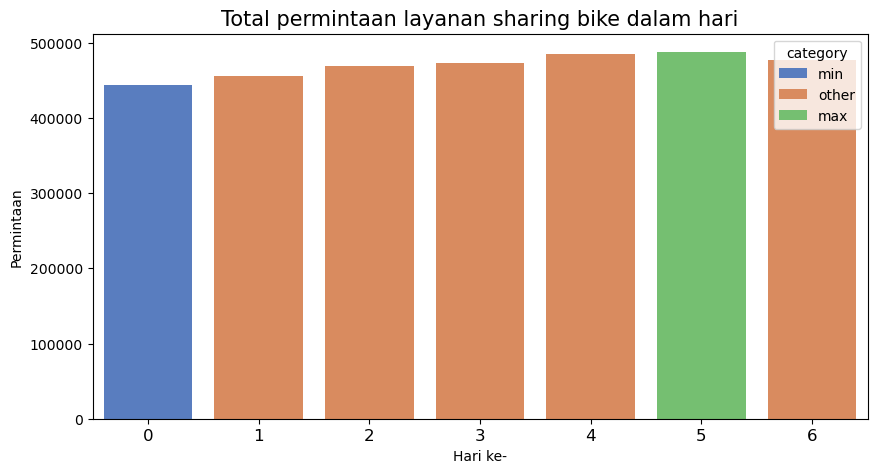

In [51]:
plt.figure(figsize=(10, 5))
sns.barplot(
    y="permintaan",
    x="hari",
    data=day_max_min_df,
    hue="category",
    palette="muted"
)
plt.title("Total permintaan layanan sharing bike dalam hari", loc="center", fontsize=15)
plt.ylabel("Permintaan")
plt.xlabel("Hari ke-")
plt.tick_params(axis="x", labelsize=12)
plt.show()

### Pertanyaan 2: **Apakah cuaca berpengaruh terhadap permintaan layanan sharing bike?**

In [53]:
hour_df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,waktu
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16,malam
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40,malam
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32,malam
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13,malam
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1,malam
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119,sore
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89,malam
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90,malam
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61,malam


In [54]:
cuaca_df = hour_df.groupby(by="weathersit").cnt.sum().sort_values(ascending=False).reset_index()
cuaca_df

,weathersit,cnt
0,1,2338173
1,2,795952
2,3,158331
3,4,223


In [55]:
cuaca_df.rename(columns={
    "weathersit": "cuaca",
    "cnt": "permintaan"
}, inplace=True)
cuaca_df

,cuaca,permintaan
0,1,2338173
1,2,795952
2,3,158331
3,4,223


C:\Users\user\AppData\Local\Temp\ipykernel_17248\2586046883.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


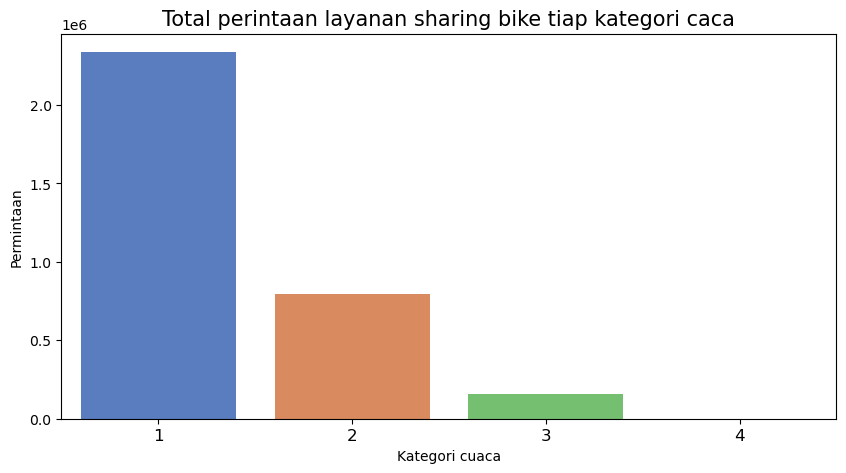

In [56]:
plt.figure(figsize=(10, 5))

sns.barplot(
    y="permintaan",
    x="cuaca",
    data=cuaca_df,
    palette="muted"
)
plt.title("Total perintaan layanan sharing bike tiap kategori caca", loc="center", fontsize=15)
plt.ylabel("Permintaan")
plt.xlabel("Kategori cuaca")
plt.tick_params(axis="x", labelsize=12)
plt.show()

### Pertanyaan 3: **Bagaimana peingkatan permintaan layanan sharing bike dari tahun sebelumnya?**

In [58]:
day_df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [59]:
tahun_df = day_df.groupby(by="yr").cnt.sum().reset_index()
tahun_df

,yr,cnt
0,0,1243103
1,1,2049576


In [60]:
tahun_df.rename(columns={
    "yr": "tahun",
    "cnt": "permintaan"
}, inplace=True)

In [61]:
tahun_df

,tahun,permintaan
0,0,1243103
1,1,2049576


In [62]:
tahun_df["tahun"] = tahun_df["tahun"].apply(
    lambda x: "2011" if x == 0 else "2012"
)

In [63]:
tahun_df

,tahun,permintaan
0,2011,1243103
1,2012,2049576


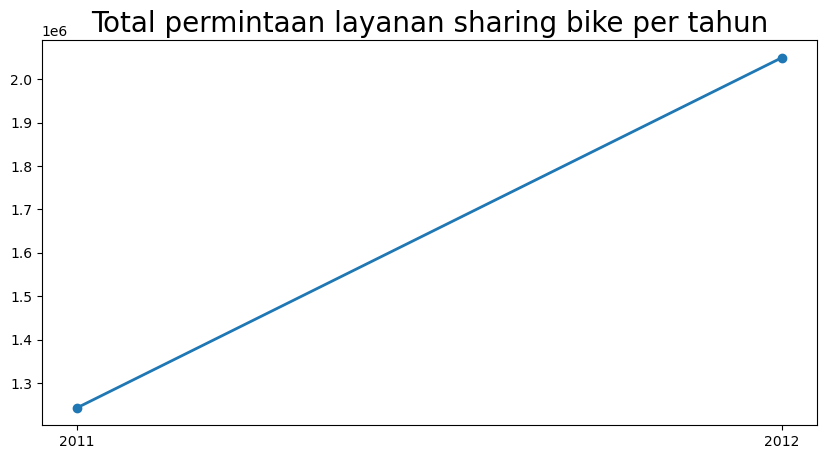

In [64]:
plt.figure(figsize=(10, 5))
plt.plot(
    tahun_df["tahun"],
    tahun_df["permintaan"],
    marker="o",
    linewidth=2
)
plt.title("Total permintaan layanan sharing bike per tahun", loc="center", fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

### Pertanyaan 4: **Kapan waktu paling banyak dan paling sedikit penggunaan layanan bike sharing?**

In [66]:
waktu_df = hour_df.groupby(by="waktu").cnt.sum().reset_index()

In [67]:
waktu_df.rename(columns={
    "cnt": "permintaan"
}, inplace=True)
waktu_df

,waktu,permintaan
0,malam,556057
1,pagi,755999
2,siang,879454
3,sore,1101169


In [68]:
waktu_df["category"] = waktu_df["permintaan"].apply(
    lambda x: "max" if x == waktu_df["permintaan"].max() else ("min" if x == waktu_df["permintaan"].min() else "other")
)
waktu_df

,waktu,permintaan,category
0,malam,556057,min
1,pagi,755999,other
2,siang,879454,other
3,sore,1101169,max


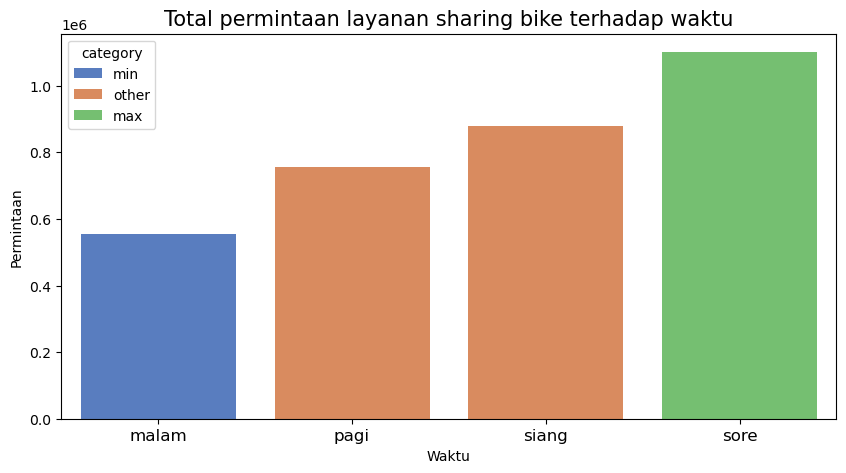

In [69]:
plt.figure(figsize=(10, 5))
sns.barplot(
    y="permintaan",
    x="waktu",
    data=waktu_df,
    palette="muted",
    hue="category"
)
plt.title("Total permintaan layanan sharing bike terhadap waktu", loc="center", fontsize=15)
plt.ylabel("Permintaan")
plt.xlabel("Waktu")
plt.tick_params(axis="x", labelsize=12)
plt.show()

## Conclusion

- Layanan bike sharing paling banyak digunakan pada hari ke-5 dan paling sedikit pada hari ke-0
- Cuaca sangat berpengaruh terhadap premintaan layanan sharing bike
- Terjadi peningkatan permintaan layanan sharing bikesebesar 64% dari tahun 2011 ke tahun 2012
- Permintaan layanan sharing bike paling banyak terjadi pada sore hari dan paling sedikit pada malam hari